  Unnamed: 0        PM1      PM2.5       PM10     PM1 a    PM2.5 a      PM10a  \
0 2022-01-31  25.419355  37.774194  45.225806  3.161897   7.848448  21.862414   
1 2022-01-31  28.728814  44.254237  54.593220  4.401500  10.359000  28.693000   
2 2022-01-31  28.084746  43.152542  52.389831  4.249298  10.220702  27.706842   
3 2022-01-31  25.406780  37.762712  45.457627  3.136333   8.105500  22.459000   
4 2022-01-31  27.491525  42.694915  52.491525  3.895345   9.753621  27.569483   

        Temp     RelHum  Unnamed: 9  Temp satelite  humidity sate  Wind_Speed  \
0  36.427586  33.951724         NaN          33.04          26.00        0.82   
1  39.170000  29.861667         NaN          32.76          26.69        0.99   
2  43.235088  22.045614         NaN          31.93          28.62        1.14   
3  44.111667  24.621667         NaN          30.19          33.81        1.14   
4  41.877586  30.260345         NaN          26.33          50.38        0.70   

   Wind_Direction  Unnamed

<ipython-input-1-677e2bce3fb5>:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PMS_7003_Alpha_Sensor_factor["Alpha_Sensor"] = 4*PMS_7003_Alpha_Sensor_factor["Alpha_Sensor"]


Correlation:  0.21377084063050453


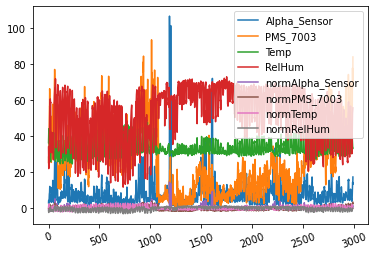

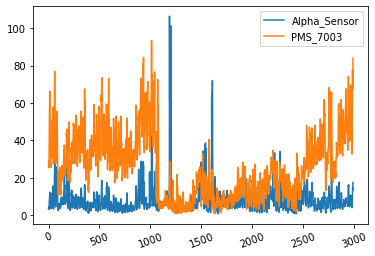

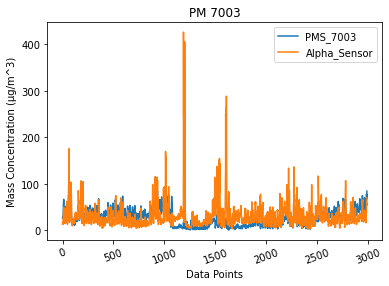

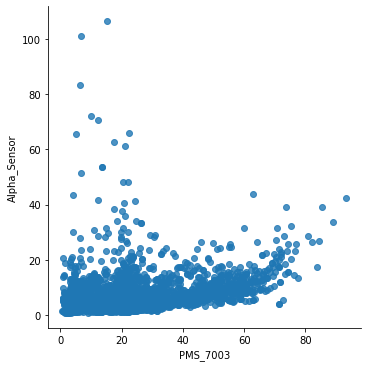

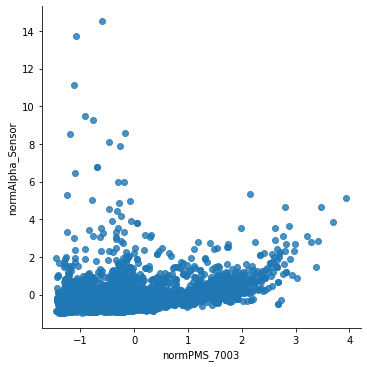

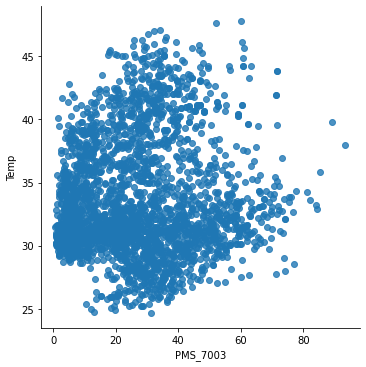

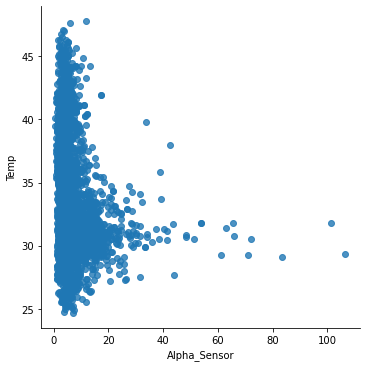

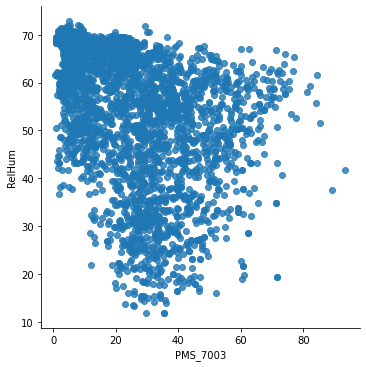

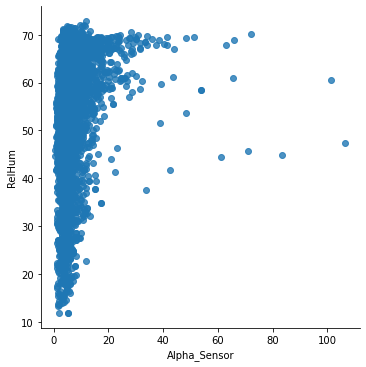

In [1]:
import pandas as pd # for data handling
import matplotlib.pyplot as plt # for linear plot
import seaborn as sns # for scatter plot
from sklearn.model_selection import train_test_split
import datetime
import math

#%%
# Read sensor data
sensor = pd.read_excel("PMS 7003.xlsx")
print(sensor.head())

# Build main dataset
df = pd.DataFrame({'Alpha_Sensor': sensor["PM1 a"], 'PMS_7003': sensor["PM1"], 'Temp': sensor["Temp"], 'RelHum': sensor["RelHum"]})

# Split main dataset and build train and test datasets
X = df[['PMS_7003', 'Temp', 'RelHum']]
Y = df['Alpha_Sensor']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state = 1, shuffle = False)

df_train = pd.DataFrame({'Alpha_Sensor': Y_train, 'PMS_7003': X_train["PMS_7003"], 'Temp': X_train["Temp"], 'RelHum': X_train["RelHum"]})
df_test = pd.DataFrame({'Alpha_Sensor': Y_test, 'PMS_7003': X_test["PMS_7003"], 'Temp': X_test["Temp"], 'RelHum': X_test["RelHum"]})

#%%
# Loss functions definition
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

def loss_functions(y_true, y_pred):
    print("Loss functions:")
    print("* R-squared =", r2_score(y_true, y_pred))
    MSE = mean_squared_error(y_true, y_pred)
    print("* RMSE =", math.sqrt(MSE))
    print("* MAE =", mean_absolute_error(y_true, y_pred))
    
# Loss
loss_functions(y_true = df_test["Alpha_Sensor"], y_pred = df_test["PMS_7003"])

# %%
# Normalise sensor data
def normalize(col):
    μ = col.mean()
    σ = col.std()
    return (col - μ)/σ

df["normAlpha_Sensor"] = normalize(df["Alpha_Sensor"])
df["normPMS_7003"] = normalize(df["PMS_7003"])
df["normTemp"] = normalize(df["Temp"])
df["normRelHum"] = normalize(df["RelHum"])

#%%
# Intro to Pandas
# Print first top lines from data
print(sensor.head(5))

#%%
# Print all data types
print(sensor.dtypes)

#%%
# Show data info summary
print(sensor.info())

#%%
# Select and print specific columns
# Temp_PMS_7003 = sensor[["Temp", "PMS_7003"]]
# print(Temp_PMS_7003.head(5))

#%%
# Simple plot
df.plot()
plt.xticks(rotation = 20)

#%%
# Data observation
# Plot the ozone (KOhms) and ozone reference data (μgr/m^3) as function of time
df[["Alpha_Sensor", "PMS_7003"]].plot()
plt.xticks(rotation = 20)

# %%
# Plot the ozone (KOhms) and ozone reference data (μgr/m^3) as function of time - factor
PMS_7003_Alpha_Sensor_factor = df[["PMS_7003", "Alpha_Sensor"]]
PMS_7003_Alpha_Sensor_factor["Alpha_Sensor"] = 4*PMS_7003_Alpha_Sensor_factor["Alpha_Sensor"]
PMS_7003_Alpha_Sensor_factor.plot()
plt.title("PM 7003")
plt.xlabel("Data Points")
plt.ylabel("Mass Concentration (μg/m^3)")
plt.xticks(rotation = 20)

# %%
# Raw scatter plot
sns.lmplot(x = 'PMS_7003', y = 'Alpha_Sensor', data = df, fit_reg = False, line_kws = {'color': 'orange'}) 

# %%
# Normalised scatter plot
sns.lmplot(x = 'normPMS_7003', y = 'normAlpha_Sensor', data = df, fit_reg = False, line_kws = {'color': 'orange'}) 

# %%
# Temp with respect to PMS_7003
sns.lmplot(x = 'PMS_7003', y = 'Temp', data = df, fit_reg = False, line_kws = {'color': 'orange'}) 

# %%
# Temp with respect to Alpha_Sensor
sns.lmplot(x = 'Alpha_Sensor', y = 'Temp', data = df, fit_reg = False, line_kws = {'color': 'orange'}) 

# %%
# RelHum with respect to PMS_7003
sns.lmplot(x = 'PMS_7003', y = 'RelHum', data = df, fit_reg = False, line_kws = {'color': 'orange'}) 

# %%
# RelHum with respect to Alpha_Sensor
sns.lmplot(x = 'Alpha_Sensor', y = 'RelHum', data = df, fit_reg = False, line_kws = {'color': 'orange'}) 

x = df["Alpha_Sensor"].tolist()
x = pd.Series(x)

y = df["PMS_7003"].tolist()
y = pd.Series(y)

corr = y.corr(x)
print("Correlation: ", corr)

Intercept: 
 -19.461552120043578
Coefficients: 
 [0.16969391 0.25293631 0.26744611]
Loss functions:
* R-squared = 0.5424450497528387
* RMSE = 2.748660236241845
* MAE = 2.205255348351505
Intercept: 
 [7.31290537]
Coefficients: 
 [2.7603076  0.96716722 3.56804591]
Iters: 
 5
{'alpha': 0.0001, 'average': False, 'early_stopping': False, 'epsilon': 0.1, 'eta0': 0.01, 'fit_intercept': True, 'l1_ratio': 0.15, 'learning_rate': 'invscaling', 'loss': 'squared_loss', 'max_iter': 5, 'n_iter_no_change': 5, 'penalty': 'l2', 'power_t': 0.25, 'random_state': None, 'shuffle': True, 'tol': 0.001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


C:\Users\Swadesh Choudhary\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1220: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


Loss functions:
* R-squared = 0.5586511570073222
* RMSE = 2.6995441014780286
* MAE = 2.1396598341989366
Correlation_MLR_Pred:  0.8201305486475707
Correlation_MLR_SGD_Pred:  0.8180186129574939


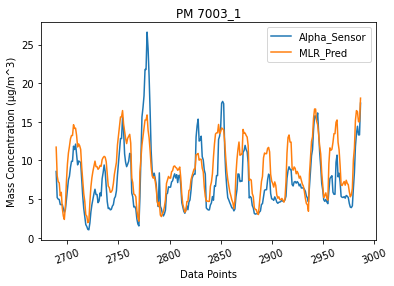

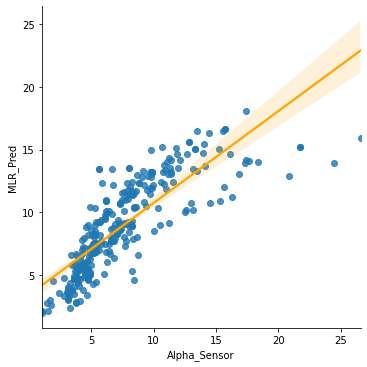

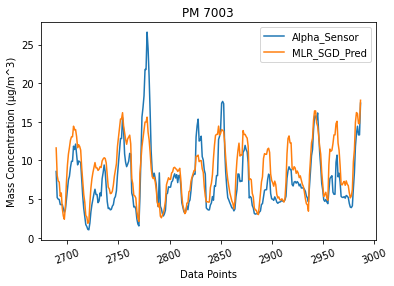

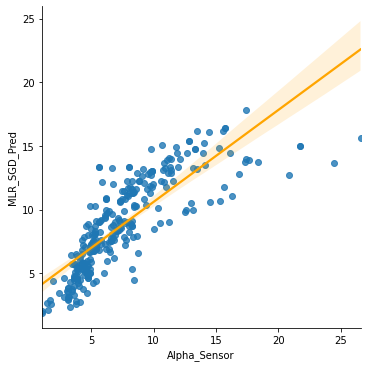

In [2]:
# %%
# Data calibration
# Multiple Linear Regression
from sklearn.linear_model import LinearRegression

# Model
lr = LinearRegression()

# Fit
lr.fit(X_train, Y_train)

# Get MLR coefficients
print('Intercept: \n', lr.intercept_)
print('Coefficients: \n', lr.coef_)

# Predict
df_test["MLR_Pred"] = lr.intercept_ + lr.coef_[0]*df_test["PMS_7003"] + lr.coef_[1]*df_test["Temp"] + lr.coef_[2]*df_test["RelHum"]
type(df_test["MLR_Pred"])
# Plot linear
df_test[["Alpha_Sensor", "MLR_Pred"]].plot()
plt.title("PM 7003_1")
plt.xlabel("Data Points")
plt.ylabel("Mass Concentration (μg/m^3)")
plt.xticks(rotation = 20)

# Plot regression
sns.lmplot(x = 'Alpha_Sensor', y = 'MLR_Pred', data = df_test, fit_reg = True, line_kws = {'color': 'orange'}) 

# Loss
loss_functions(y_true = df_test["Alpha_Sensor"], y_pred = df_test["MLR_Pred"])

# %%
# Multiple Linear Regression with Stochastic Gradient Descent
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

# Model
# sgdr = SGDRegressor(loss='squared_loss', alpha=.001, tol=1e-5)
sgdr = SGDRegressor(loss = 'squared_loss', max_iter = 5)

# Normalize
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fit
sgdr.fit(X_train, Y_train)

# Get MLR coefficients
print('Intercept: \n', sgdr.intercept_)
print('Coefficients: \n', sgdr.coef_)
print('Iters: \n', sgdr.n_iter_)
print(sgdr.get_params())

# Predict
# df_test["MLR_SGDR_Pred"] = sgdr.intercept_ + sgdr.coef_[0]*X_test[0] + sgdr.coef_[1]*X_test[1] - sgdr.coef_[2]*X_test[2]
df_test["MLR_SGD_Pred"] = sgdr.predict(X_test)

# Plot linear
df_test[["Alpha_Sensor", "MLR_SGD_Pred"]].plot()
plt.title("PM 7003")
plt.xlabel("Data Points")
plt.ylabel("Mass Concentration (μg/m^3)")
plt.xticks(rotation = 20)

# Plot regression
sns.lmplot(x = 'Alpha_Sensor', y = 'MLR_SGD_Pred', data = df_test, fit_reg = True, line_kws = {'color': 'orange'}) 

# Loss
loss_functions(y_true = df_test["Alpha_Sensor"], y_pred = df_test["MLR_SGD_Pred"])

x = df["Alpha_Sensor"].tolist()
x = pd.Series(x)
corr_MLR_Pred = df_test["MLR_Pred"].corr(x)
corr_MLR_SGD_Pred = df_test["MLR_SGD_Pred"].corr(x)
print("Correlation_MLR_Pred: ", corr_MLR_Pred)
print("Correlation_MLR_SGD_Pred: ", corr_MLR_SGD_Pred)

      Alpha_Sensor   PMS_7003       Temp     RelHum   MLR_Pred  MLR_SGD_Pred  \
2689      8.573500  47.007937  28.928333  59.416667  11.723190     11.617707   
2690      5.196000  39.857143  28.518333  50.428333   8.002146      8.047597   
2691      4.997667  39.255556  28.483333  48.046667   7.254240      7.334482   
2692      4.950667  41.305556  28.540000  46.113333   7.099383      7.199586   
2693      4.300385  43.204839  41.826923  26.138462   5.440223      5.376255   
...            ...        ...        ...        ...        ...           ...   
2983     13.455667  77.715873  34.303333  52.533333  16.452752     16.199495   
2984     14.424333  76.093651  33.858333  53.418333  16.301604     16.054301   
2985     13.308667  67.358730  33.695000  54.291667  15.011598     14.776729   
2986     13.308667  67.358730  33.695000  54.291667  15.011598     14.776729   
2987     17.412833  83.863492  33.226667  55.665000  18.061190     17.786984   

       KNN_Pred  
2689  11.315161  
269

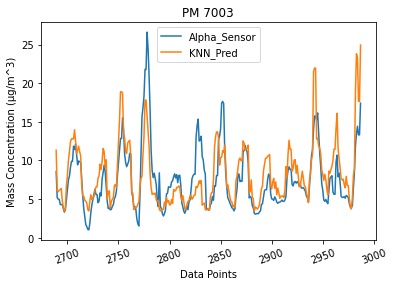

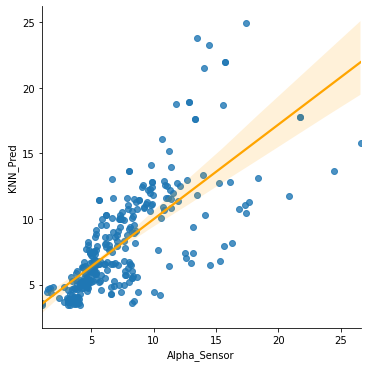

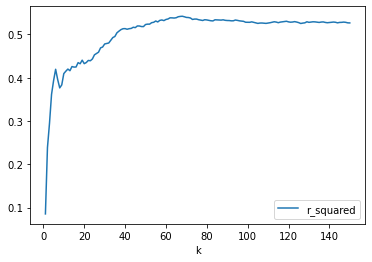

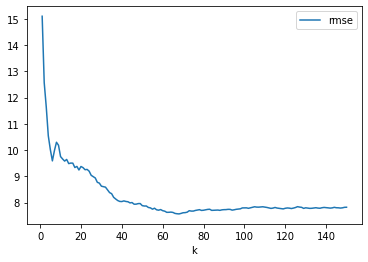

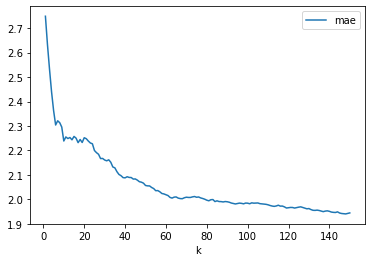

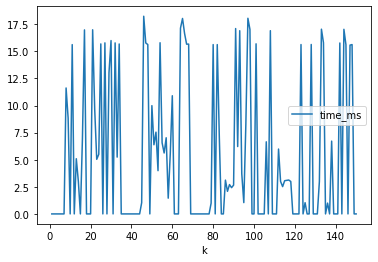

In [3]:
# %%
# K-Nearest Neighbor
from sklearn.neighbors import KNeighborsRegressor

# Model
knn = KNeighborsRegressor(n_neighbors = 19)

# Fit
knn.fit(X_train, Y_train)

# Predict
df_test["KNN_Pred"] = knn.predict(X_test)
print(df_test)

# Plot linear
df_test[["Alpha_Sensor", "KNN_Pred"]].plot()
plt.title("PM 7003")
plt.xlabel("Data Points")
plt.ylabel("Mass Concentration (μg/m^3)")
plt.xticks(rotation=20)

# Plot regression
sns.lmplot(x = 'Alpha_Sensor', y = 'KNN_Pred', data = df_test, fit_reg = True, line_kws = {'color': 'orange'}) 

# Loss
loss_functions(y_true = df_test["Alpha_Sensor"], y_pred = df_test["KNN_Pred"])

# %%
# K-Nearest Neighbor stats vs. hyperparameters
def knn_stats():
    knn_aux = pd.DataFrame({'Alpha_Sensor': Y_test})

    n_neighbors = [*range(1, 151, 1)]
    r_squared = []
    rmse = []
    mae = []
    time_ms = []

    for i in n_neighbors:
        # Model
        knn = KNeighborsRegressor(n_neighbors=i)

        # Fit
        start_time = float(datetime.datetime.now().strftime('%S.%f'))
        knn.fit(X_train, Y_train)
        end_time = float(datetime.datetime.now().strftime('%S.%f'))
        execution_time = (end_time - start_time) * 1000

        # Predict
        knn_aux["KNN_Pred"] = knn.predict(X_test)

        # Loss
        r_squared.append(r2_score(knn_aux["Alpha_Sensor"], knn_aux["KNN_Pred"]))
        rmse.append(mean_squared_error(knn_aux["Alpha_Sensor"], knn_aux["KNN_Pred"]))
        mae.append(mean_absolute_error(knn_aux["Alpha_Sensor"], knn_aux["KNN_Pred"]))
        time_ms.append(execution_time)

    knn_stats = pd.DataFrame({'k': n_neighbors, 'r_squared': r_squared, 'rmse': rmse, 'mae': mae, 'time_ms': time_ms})
    knn_stats = knn_stats.set_index('k') # index column (X axis for the plots)
    print(knn_stats)

    # plot
    knn_stats[["r_squared"]].plot()
    knn_stats[["rmse"]].plot()
    knn_stats[["mae"]].plot()
    knn_stats[["time_ms"]].plot()

knn_stats()

x = df["Alpha_Sensor"].tolist()
x = pd.Series(x)
corr_KNN_Pred = df_test["KNN_Pred"].corr(x)
print("Correlation_KNN_Pred: ", corr_KNN_Pred)

      Alpha_Sensor   PMS_7003       Temp     RelHum   MLR_Pred  MLR_SGD_Pred  \
2689      8.573500  47.007937  28.928333  59.416667  11.723190     11.617707   
2690      5.196000  39.857143  28.518333  50.428333   8.002146      8.047597   
2691      4.997667  39.255556  28.483333  48.046667   7.254240      7.334482   
2692      4.950667  41.305556  28.540000  46.113333   7.099383      7.199586   
2693      4.300385  43.204839  41.826923  26.138462   5.440223      5.376255   
...            ...        ...        ...        ...        ...           ...   
2983     13.455667  77.715873  34.303333  52.533333  16.452752     16.199495   
2984     14.424333  76.093651  33.858333  53.418333  16.301604     16.054301   
2985     13.308667  67.358730  33.695000  54.291667  15.011598     14.776729   
2986     13.308667  67.358730  33.695000  54.291667  15.011598     14.776729   
2987     17.412833  83.863492  33.226667  55.665000  18.061190     17.786984   

       KNN_Pred    RF_Pred  
2689  11.3

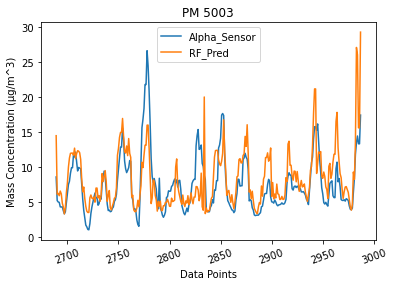

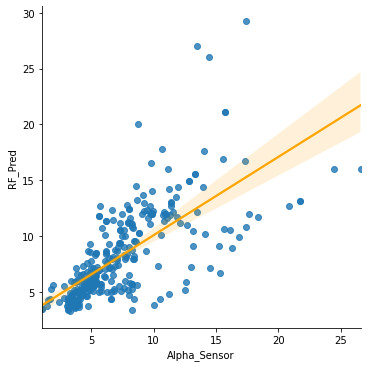

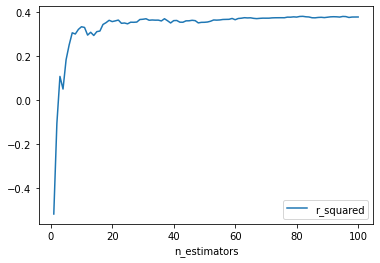

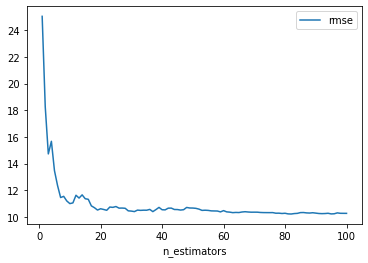

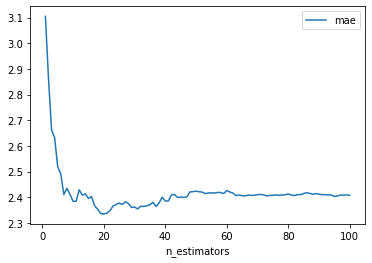

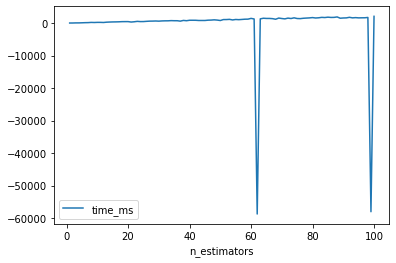

In [4]:
# %%
# Random Forest
from sklearn.ensemble import RandomForestRegressor

# Model
rf = RandomForestRegressor(n_estimators = 20 ,random_state = 0)

# Fit
rf.fit(X_train, Y_train)

# Predict
df_test["RF_Pred"] = rf.predict(X_test)
print(df_test)

# Plot linear
df_test[["Alpha_Sensor", "RF_Pred"]].plot()
plt.title("PM 5003")
plt.xlabel("Data Points")
plt.ylabel("Mass Concentration (μg/m^3)")
plt.xticks(rotation = 20)

# Plot regression
sns.lmplot(x = 'Alpha_Sensor', y = 'RF_Pred', data = df_test, fit_reg = True, line_kws = {'color': 'orange'}) 

# Loss
loss_functions(y_true = df_test["Alpha_Sensor"], y_pred = df_test["RF_Pred"])

# RF feature importances
print('Feature importances:\n', list(zip(X.columns, rf.feature_importances_)))


# %%
# Random Forest stats vs. hyperparameters
def rf_stats():
    rf_aux = pd.DataFrame({'Alpha_Sensor': Y_test})

    n_estimators = [*range(1, 101, 1)]
    r_squared = []
    rmse = []
    mae = []
    time_ms = []

    for i in n_estimators:
        rf=RandomForestRegressor(n_estimators=i,random_state=0)

        # fit
        start_time = float(datetime.datetime.now().strftime('%S.%f'))
        rf.fit(X_train, Y_train)
        end_time = float(datetime.datetime.now().strftime('%S.%f'))
        execution_time = (end_time - start_time) * 1000

        # predict
        rf_aux["RF_Pred"] = rf.predict(X_test)
        x = df["Alpha_Sensor"].tolist()
        x = pd.Series(x)
        corr = rf_aux["RF_Pred"].corr(x)
        print("Correlation: ", corr)

        # Loss
        r_squared.append(r2_score(rf_aux["Alpha_Sensor"], rf_aux["RF_Pred"]))
        rmse.append(mean_squared_error(rf_aux["Alpha_Sensor"], rf_aux["RF_Pred"]))
        mae.append(mean_absolute_error(rf_aux["Alpha_Sensor"], rf_aux["RF_Pred"]))
        time_ms.append(execution_time)

    rf_stats = pd.DataFrame({'n_estimators': n_estimators, 'r_squared': r_squared, 'rmse': rmse, 'mae': mae, 'time_ms': time_ms})
    rf_stats = rf_stats.set_index('n_estimators') # index column (X axis for the plots)
    print(rf_stats)

    # plot
    rf_stats[["r_squared"]].plot()
    rf_stats[["rmse"]].plot()
    rf_stats[["mae"]].plot()
    rf_stats[["time_ms"]].plot()

rf_stats()
x = df["Alpha_Sensor"].tolist()
x = pd.Series(x)
corr = df_test["RF_Pred"].corr(x)
print("Correlation is : ", corr)

      Alpha_Sensor   PMS_7003       Temp     RelHum   MLR_Pred  MLR_SGD_Pred  \
2689      8.573500  47.007937  28.928333  59.416667  11.723190     11.617707   
2690      5.196000  39.857143  28.518333  50.428333   8.002146      8.047597   
2691      4.997667  39.255556  28.483333  48.046667   7.254240      7.334482   
2692      4.950667  41.305556  28.540000  46.113333   7.099383      7.199586   
2693      4.300385  43.204839  41.826923  26.138462   5.440223      5.376255   
...            ...        ...        ...        ...        ...           ...   
2983     13.455667  77.715873  34.303333  52.533333  16.452752     16.199495   
2984     14.424333  76.093651  33.858333  53.418333  16.301604     16.054301   
2985     13.308667  67.358730  33.695000  54.291667  15.011598     14.776729   
2986     13.308667  67.358730  33.695000  54.291667  15.011598     14.776729   
2987     17.412833  83.863492  33.226667  55.665000  18.061190     17.786984   

       KNN_Pred    RF_Pred    NN_Pred  

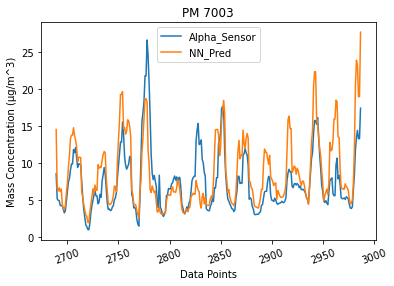

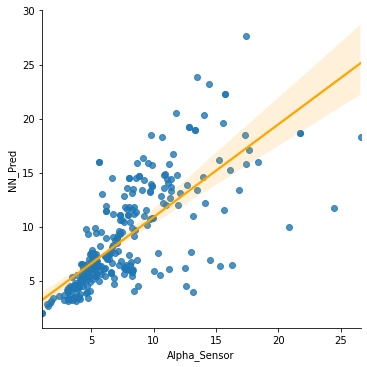

In [5]:
# %%
# Neural Network - SKL
from sklearn.neural_network import MLPRegressor

# Model
mlp = MLPRegressor(hidden_layer_sizes=(16,16), activation='relu', solver='adam', max_iter=1000)

# Fit
mlp.fit(X_train,Y_train)

# Predict
# predict_train = mlp.predict(X_train)
df_test["NN_Pred"] = mlp.predict(X_test)
print(df_test)

# Plot linear
df_test[["Alpha_Sensor", "NN_Pred"]].plot()
plt.title("PM 7003")
plt.xlabel("Data Points")
plt.ylabel("Mass Concentration (μg/m^3)")
plt.xticks(rotation=20)

# Plot regression
sns.lmplot(x = 'Alpha_Sensor', y = 'NN_Pred', data = df_test, fit_reg = True, line_kws = {'color': 'orange'}) 

# Loss
loss_functions(y_true = df_test["Alpha_Sensor"], y_pred = df_test["NN_Pred"])

x = df["Alpha_Sensor"].tolist()
x = pd.Series(x)
corr_NN = df_test["NN_Pred"].corr(x)
print("Correlation_NN: ", corr_NN)

Loss functions:
* R-squared = 0.48012246717394147
* RMSE = 2.9298808231172027
* MAE = 2.0982891500540286
Loss functions:
* R-squared = 0.6382725740746411
* RMSE = 2.4439378052460126
* MAE = 1.726885217762366
Loss functions:
* R-squared = 0.24042055594535994
* RMSE = 3.541490100747798
* MAE = 2.383916532272211
Correlation_corr_RBF_Pred:  0.7268496181348768
Correlation_corr_lin:  0.8138794158336278
Correlation_corr_Poly_Pred:  0.6694374359473945


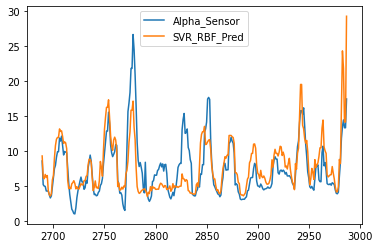

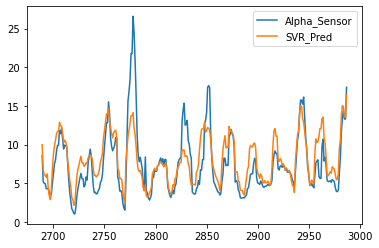

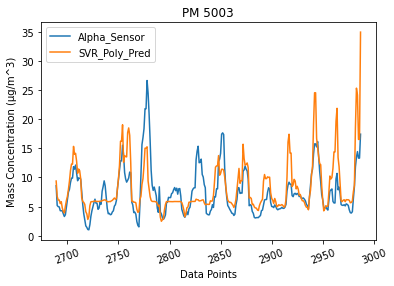

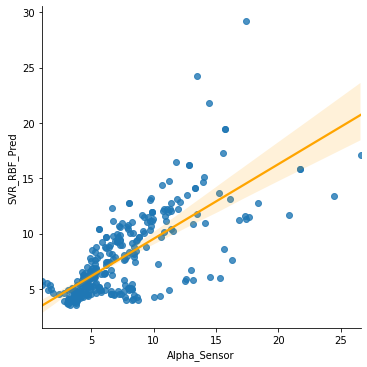

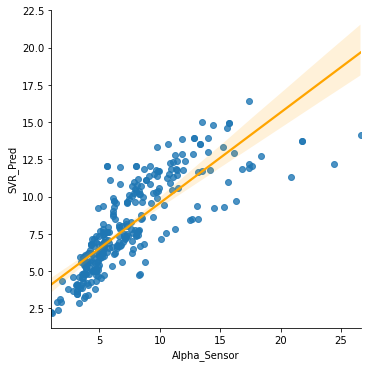

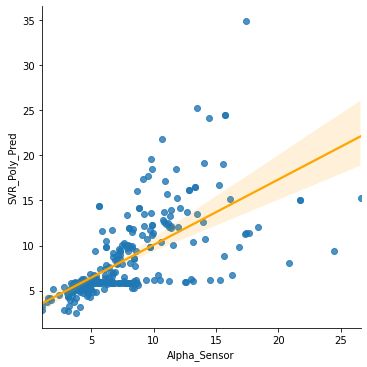

In [6]:
# %%
# Support Vector Regression
from sklearn.svm import SVR

# Models
svr_rbf = SVR(kernel = 'rbf', C = 1e3)#, gamma=0.1)
svr_lin = SVR(kernel = 'linear', C = 1e3)
svr_poly = SVR(kernel = 'poly', C = 1e3, degree = 3)

# Fit
svr_rbf.fit(X_train, Y_train)
svr_lin.fit(X_train, Y_train)
svr_poly.fit(X_train, Y_train)

# Predict
df_test["SVR_RBF_Pred"] = svr_rbf.predict(X_test)
df_test["SVR_Pred"] = svr_lin.predict(X_test)
df_test["SVR_Poly_Pred"] = svr_poly.predict(X_test)

# Plot linear
df_test[["Alpha_Sensor", "SVR_RBF_Pred"]].plot()
df_test[["Alpha_Sensor", "SVR_Pred"]].plot()
df_test[["Alpha_Sensor", "SVR_Poly_Pred"]].plot()
plt.title("PM 5003")
plt.xlabel("Data Points")
plt.ylabel("Mass Concentration (μg/m^3)")
plt.xticks(rotation=20)

# Plot regression
sns.lmplot(x = 'Alpha_Sensor', y = 'SVR_RBF_Pred', data = df_test, fit_reg = True, line_kws = {'color': 'orange'}) 
sns.lmplot(x = 'Alpha_Sensor', y = 'SVR_Pred', data = df_test, fit_reg = True, line_kws = {'color': 'orange'}) 
sns.lmplot(x = 'Alpha_Sensor', y = 'SVR_Poly_Pred', data = df_test, fit_reg = True, line_kws = {'color': 'orange'}) 

# Loss
loss_functions(y_true = df_test["Alpha_Sensor"], y_pred = df_test["SVR_RBF_Pred"])
loss_functions(y_true = df_test["Alpha_Sensor"], y_pred = df_test["SVR_Pred"])
loss_functions(y_true = df_test["Alpha_Sensor"], y_pred = df_test["SVR_Poly_Pred"])

x = df["Alpha_Sensor"].tolist()
x = pd.Series(x)
corr_RBF_Pred = df_test["SVR_RBF_Pred"].corr(x)
corr_lin = df_test["SVR_Pred"].corr(x)
corr_Poly_Pred = df_test["SVR_Poly_Pred"].corr(x)
print("Correlation_corr_RBF_Pred: ", corr_RBF_Pred)
print("Correlation_corr_lin: ", corr_lin)
print("Correlation_corr_Poly_Pred: ", corr_Poly_Pred)

C:\Users\Swadesh Choudhary\anaconda3\lib\site-packages\sklearn\gaussian_process\kernels.py:402: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn("The optimal value found for "


Dot params {'alpha': 150, 'copy_X_train': True, 'kernel__k1': DotProduct(sigma_0=1), 'kernel__k2': WhiteKernel(noise_level=1), 'kernel__k1__sigma_0': 1.0, 'kernel__k1__sigma_0_bounds': (1e-05, 100000.0), 'kernel__k2__noise_level': 1.0, 'kernel__k2__noise_level_bounds': (1e-05, 100000.0), 'kernel': DotProduct(sigma_0=1) + WhiteKernel(noise_level=1), 'n_restarts_optimizer': 0, 'normalize_y': False, 'optimizer': 'fmin_l_bfgs_b', 'random_state': 0}
Loss functions:
* R-squared = 0.5666687138030589
* RMSE = 2.674911719591674
* MAE = 2.106240717757023
Correlation:  0.8115436759646659


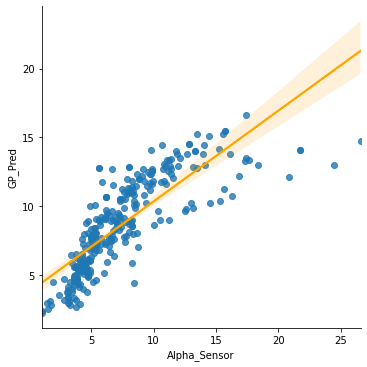

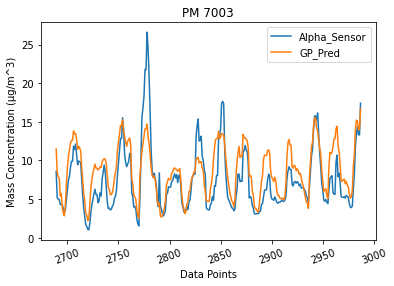

In [7]:
# %%
# Gaussian Process
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel, RBF, DotProduct, WhiteKernel

# Kernels definition
# rbf = ConstantKernel(constant_value=1.0, constant_value_bounds=(1e-10, 1e10)) * RBF(length_scale=1.0, length_scale_bounds=(1e-10, 1e10))
dpwh = DotProduct() + WhiteKernel()

# Models
gp_dpwh = GaussianProcessRegressor(kernel = dpwh, alpha = 150, random_state = 0)

# Fit
gp_dpwh.fit(X_train, Y_train)

# Predict
df_test["GP_Pred"] = gp_dpwh.predict(X_test)

# Obtain optimized kernel parameters
# l = gp.kernel_.k2.get_params()['length_scale']
# sigma_f = np.sqrt(gp.kernel_.k1.get_params()['constant_value'])

# Print parameters
print("Dot params", gp_dpwh.get_params())

# Plot regression
sns.lmplot(x = 'Alpha_Sensor', y = 'GP_Pred', data = df_test, fit_reg = True, line_kws = {'color': 'orange'}) 

# Loss
loss_functions(y_true = df_test["Alpha_Sensor"], y_pred = df_test["GP_Pred"])

# Plot linear
df_test[["Alpha_Sensor", "GP_Pred"]].plot()
plt.title("PM 7003")
plt.xlabel("Data Points")
plt.ylabel("Mass Concentration (μg/m^3)")
plt.xticks(rotation = 20)

x = df["Alpha_Sensor"].tolist()
x = pd.Series(x)
corr_d = df_test["GP_Pred"].corr(x)
print("Correlation: ", corr_d)